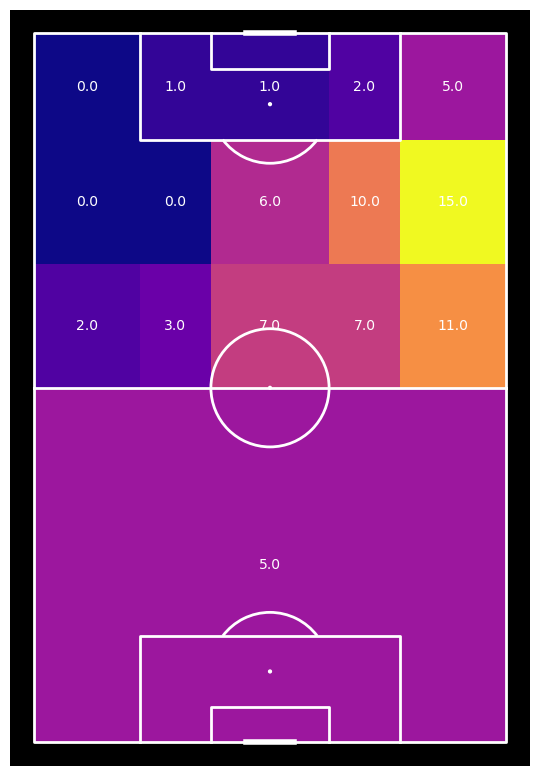

In [1]:
from mplsoccer import VerticalPitch, Sbopen

# data for Messi
parser = Sbopen()
events = parser.event(15946)[0]
events = events[(events.type_name == 'Pass') &
                (events.player_name == 'Lionel Andrés Messi Cuccittini') &
                (events.outcome_name.isnull())].copy()

# plot pitch
pitch = VerticalPitch(line_zorder=3, line_color='white', pitch_color='black')
fig, ax = pitch.draw(figsize=(5.5, 8))

# over half way line
bins = (pitch.dim.positional_x[[0, 3, 4, 5, 6]], pitch.dim.positional_y)
bs1 = pitch.bin_statistic(events.x, events.y, bins=bins)
bs1['statistic'] = bs1['statistic'][:, 1:]
bs1['x_grid'] = bs1['x_grid'][:, 1:]
bs1['y_grid'] = bs1['y_grid'][:, 1:]
bs1['cx'] = bs1['cx'][:, 1:]
bs1['cy'] = bs1['cy'][:, 1:]

# before half way line
bs2 = pitch.bin_statistic(events.x, events.y, bins=(2,1))
bs2['statistic'] = bs2['statistic'][:, :1]
bs2['x_grid'] = bs2['x_grid'][:, :-1]
bs2['y_grid'] = bs2['y_grid'][:, :-1]
bs2['cx'] = bs2['cx'][:, :1]
bs2['cy'] = bs2['cy'][:, :1]

# plot heatmaps
hm1 = pitch.heatmap_positional([bs1, bs2], ax=ax, cmap='plasma')
pitch.label_heatmap([bs1, bs2], va='center', ha='center', color='white', ax=ax);